In [1]:
import numpy as np
import pyproj
import glob
import datetime
from netCDF4 import Dataset
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
np.float = float

### load grid

In [2]:
def WGS84toEASE2(lon, lat):
    proj_EASE2 = pyproj.Proj("+proj=laea +lon_0=0 +lat_0=-90 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")
    proj_WGS84 = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs ")
    x , y = pyproj.transform(proj_WGS84, proj_EASE2, lon, lat)
    return x, y

file='/Users/carmennab/cpom_server//home/gch/SS_budget_23/grids_S/Pathfinder_gs_SH.npz'
npzfile =  np.load(file)
lon = npzfile["lons"]
lat = npzfile["lats"]
grid_x, grid_y = WGS84toEASE2(lon, lat)

In [3]:
datapath = '/Users/carmennab/cpom_server/home/gch/SS_budget_23/2024-08-15/data_out_smoothed/'
files = sorted(glob.glob(datapath+'*.nc'))

In [4]:
seasons = ['summer','autumn','winter','spring']
season_months = [[11,12,1],[2,3,4],[5,6,7],[8,9,10]]

In [5]:
budget_terms = ['intensification','advection','divergence','residual','ice_drift_x','ice_drift_y']

In [6]:
figpath = '/Users/carmennab/Dropbox/michel_csao/figures/'

/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:29: RuntimeWarning: Mean of empty slice
  climatologies[term] = np.nanmean(np.array([data for data in all_budgets[term]]),axis=0)
/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:37: RuntimeWarning: Mean of empty slice
  drift_mean_x = np.nanmean(np.array([data for data in year_data['ice_drift_x']]),axis=0)
/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:39: RuntimeWarning: Mean of empty slice
  drift_mean_y = np.nanmean(np.array([data for data in year_data['ice_drift_y']]),axis=0)
/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:43: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(np.array([data for data in year_data[term]]),axis=0)


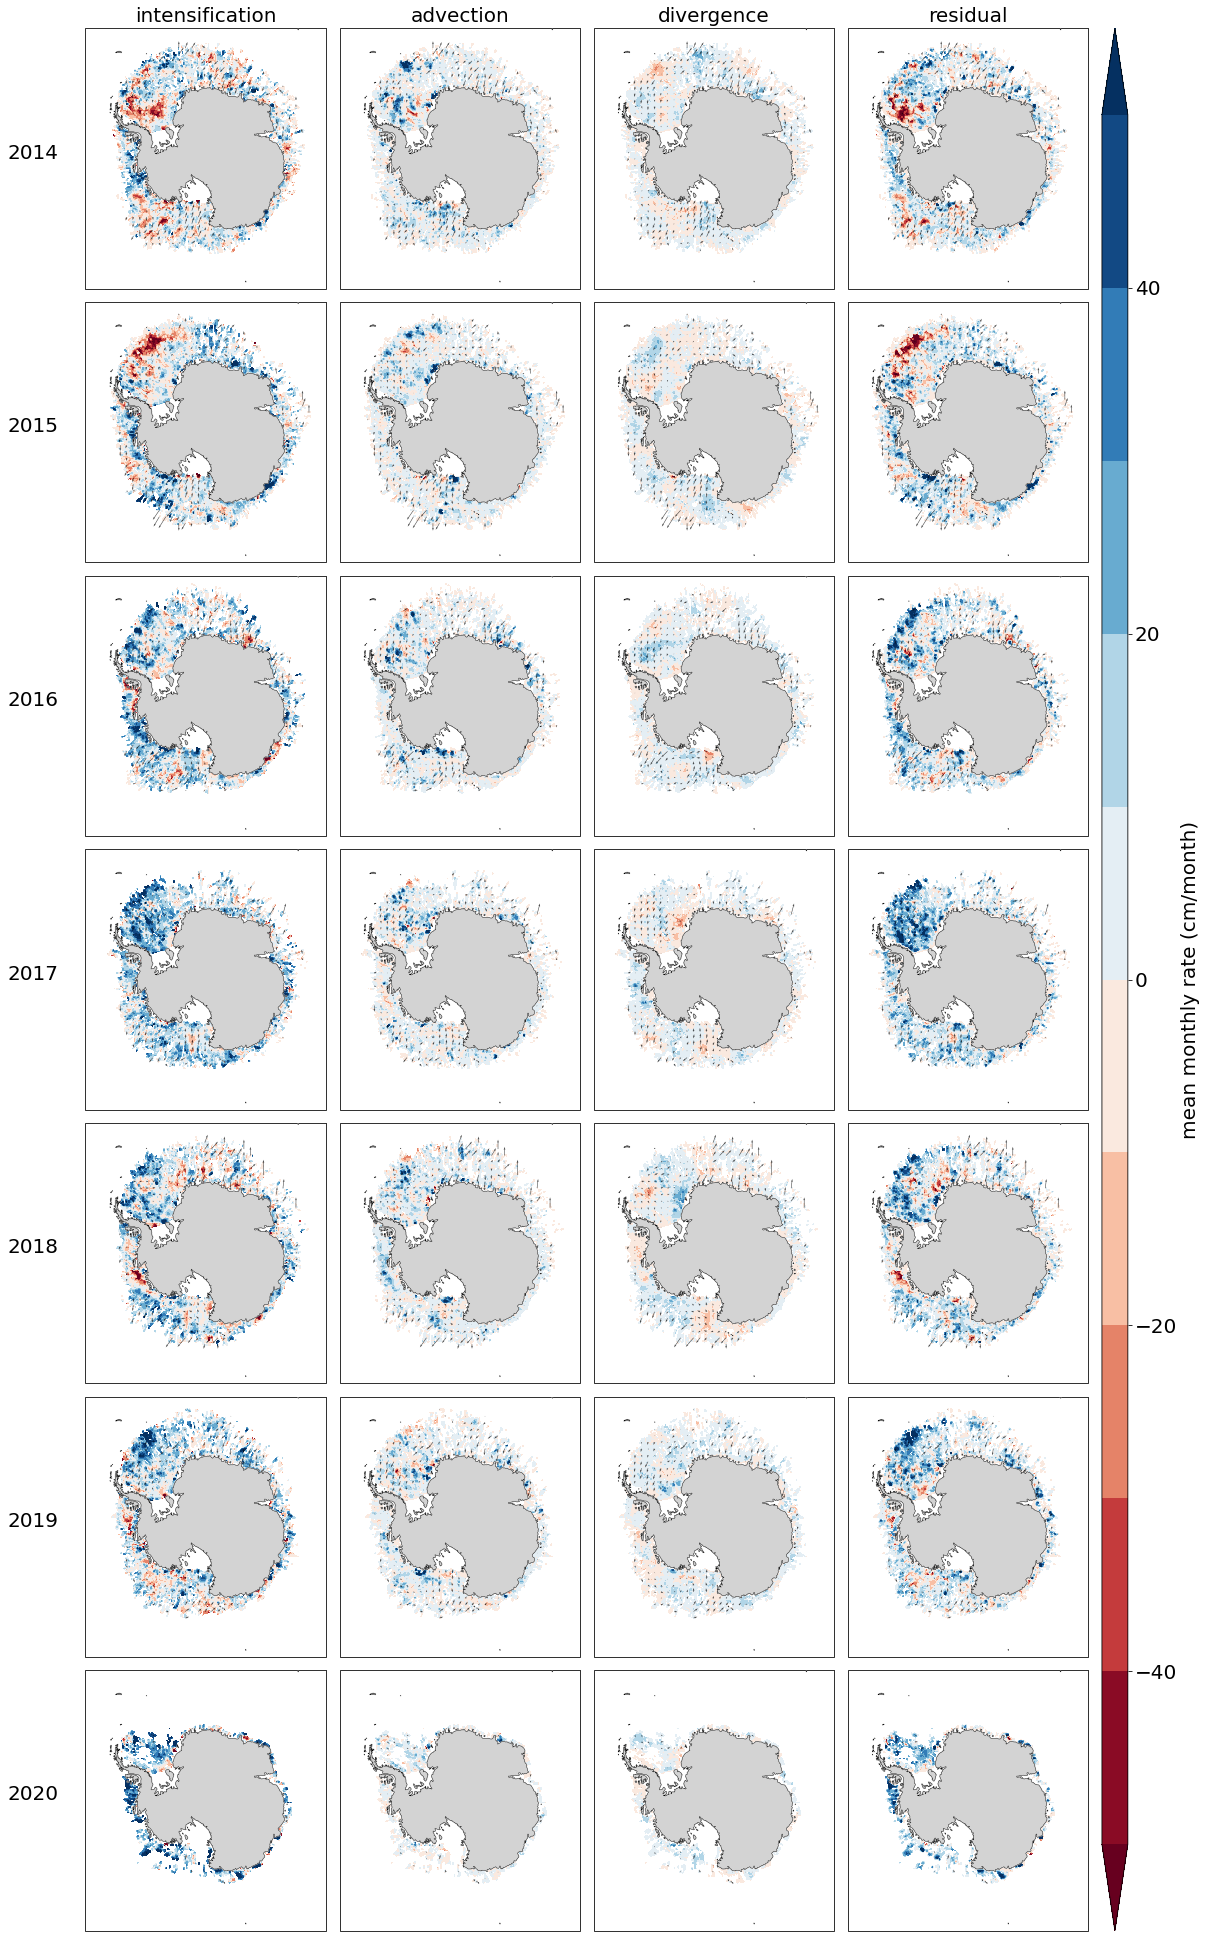

/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:29: RuntimeWarning: Mean of empty slice
  climatologies[term] = np.nanmean(np.array([data for data in all_budgets[term]]),axis=0)
/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:37: RuntimeWarning: Mean of empty slice
  drift_mean_x = np.nanmean(np.array([data for data in year_data['ice_drift_x']]),axis=0)
/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:39: RuntimeWarning: Mean of empty slice
  drift_mean_y = np.nanmean(np.array([data for data in year_data['ice_drift_y']]),axis=0)
/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:43: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(np.array([data for data in year_data[term]]),axis=0)


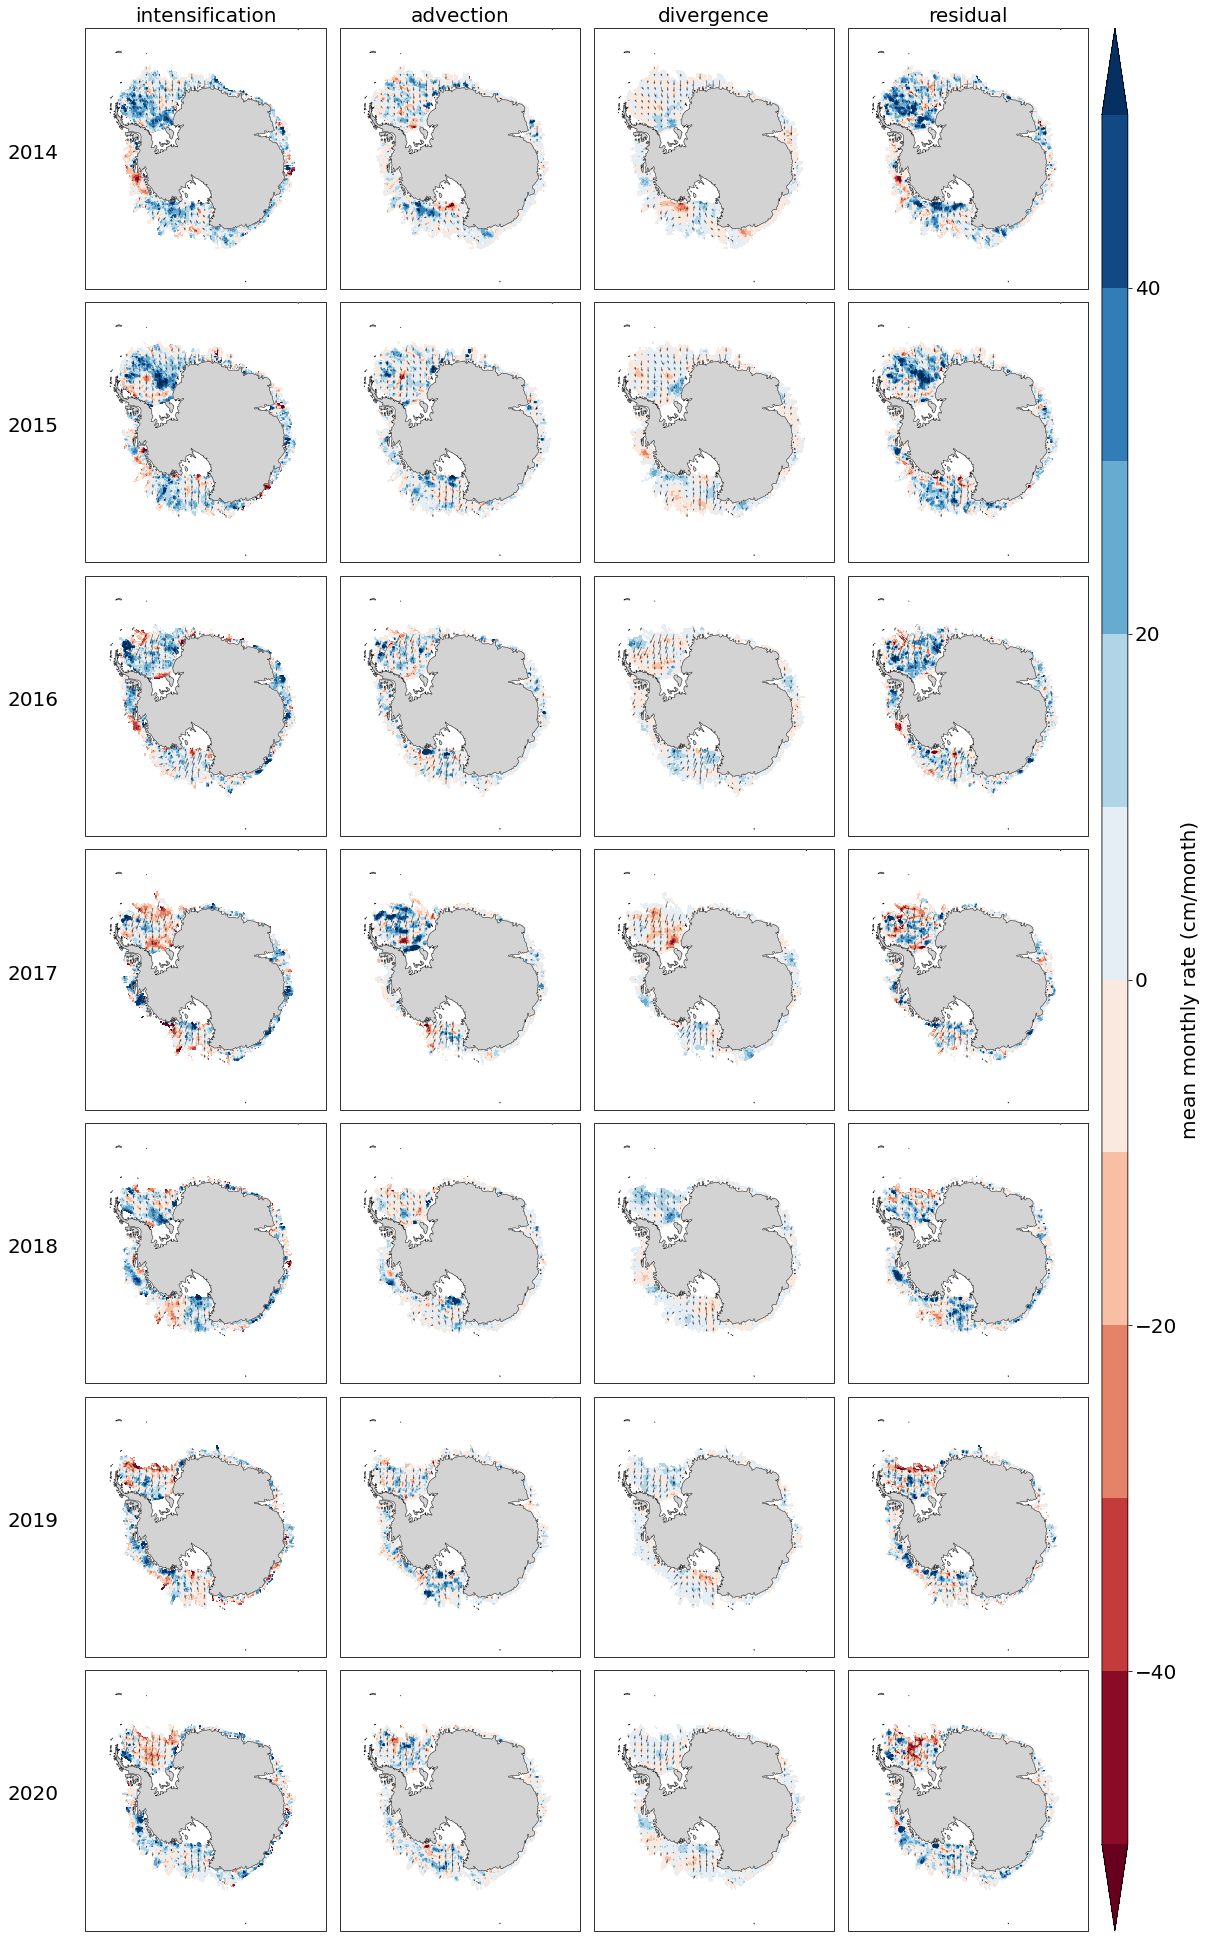

/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:29: RuntimeWarning: Mean of empty slice
  climatologies[term] = np.nanmean(np.array([data for data in all_budgets[term]]),axis=0)
/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:37: RuntimeWarning: Mean of empty slice
  drift_mean_x = np.nanmean(np.array([data for data in year_data['ice_drift_x']]),axis=0)
/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:39: RuntimeWarning: Mean of empty slice
  drift_mean_y = np.nanmean(np.array([data for data in year_data['ice_drift_y']]),axis=0)
/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:43: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(np.array([data for data in year_data[term]]),axis=0)


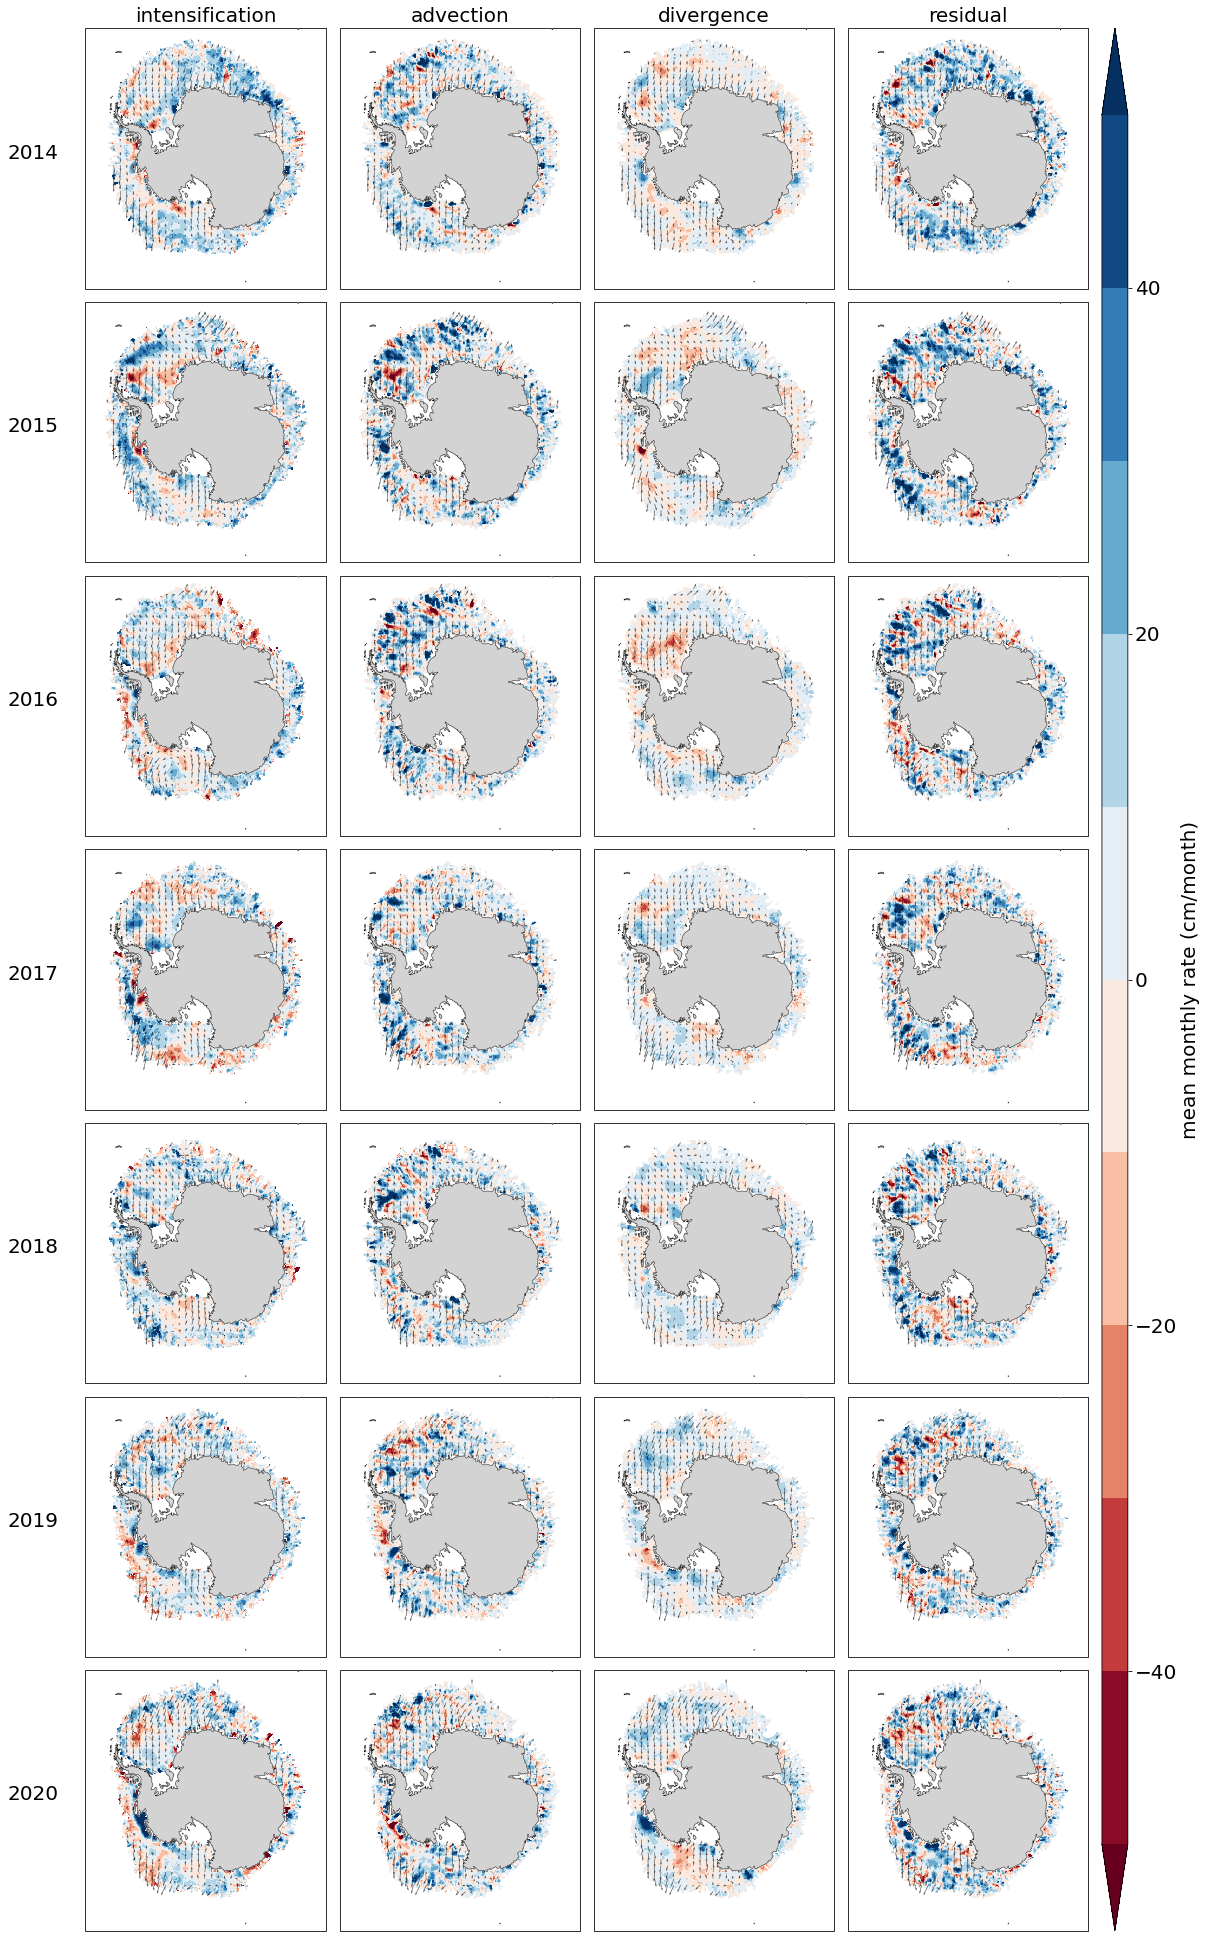

/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:29: RuntimeWarning: Mean of empty slice
  climatologies[term] = np.nanmean(np.array([data for data in all_budgets[term]]),axis=0)
/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:37: RuntimeWarning: Mean of empty slice
  drift_mean_x = np.nanmean(np.array([data for data in year_data['ice_drift_x']]),axis=0)
/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:39: RuntimeWarning: Mean of empty slice
  drift_mean_y = np.nanmean(np.array([data for data in year_data['ice_drift_y']]),axis=0)
/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_22239/273117925.py:43: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(np.array([data for data in year_data[term]]),axis=0)


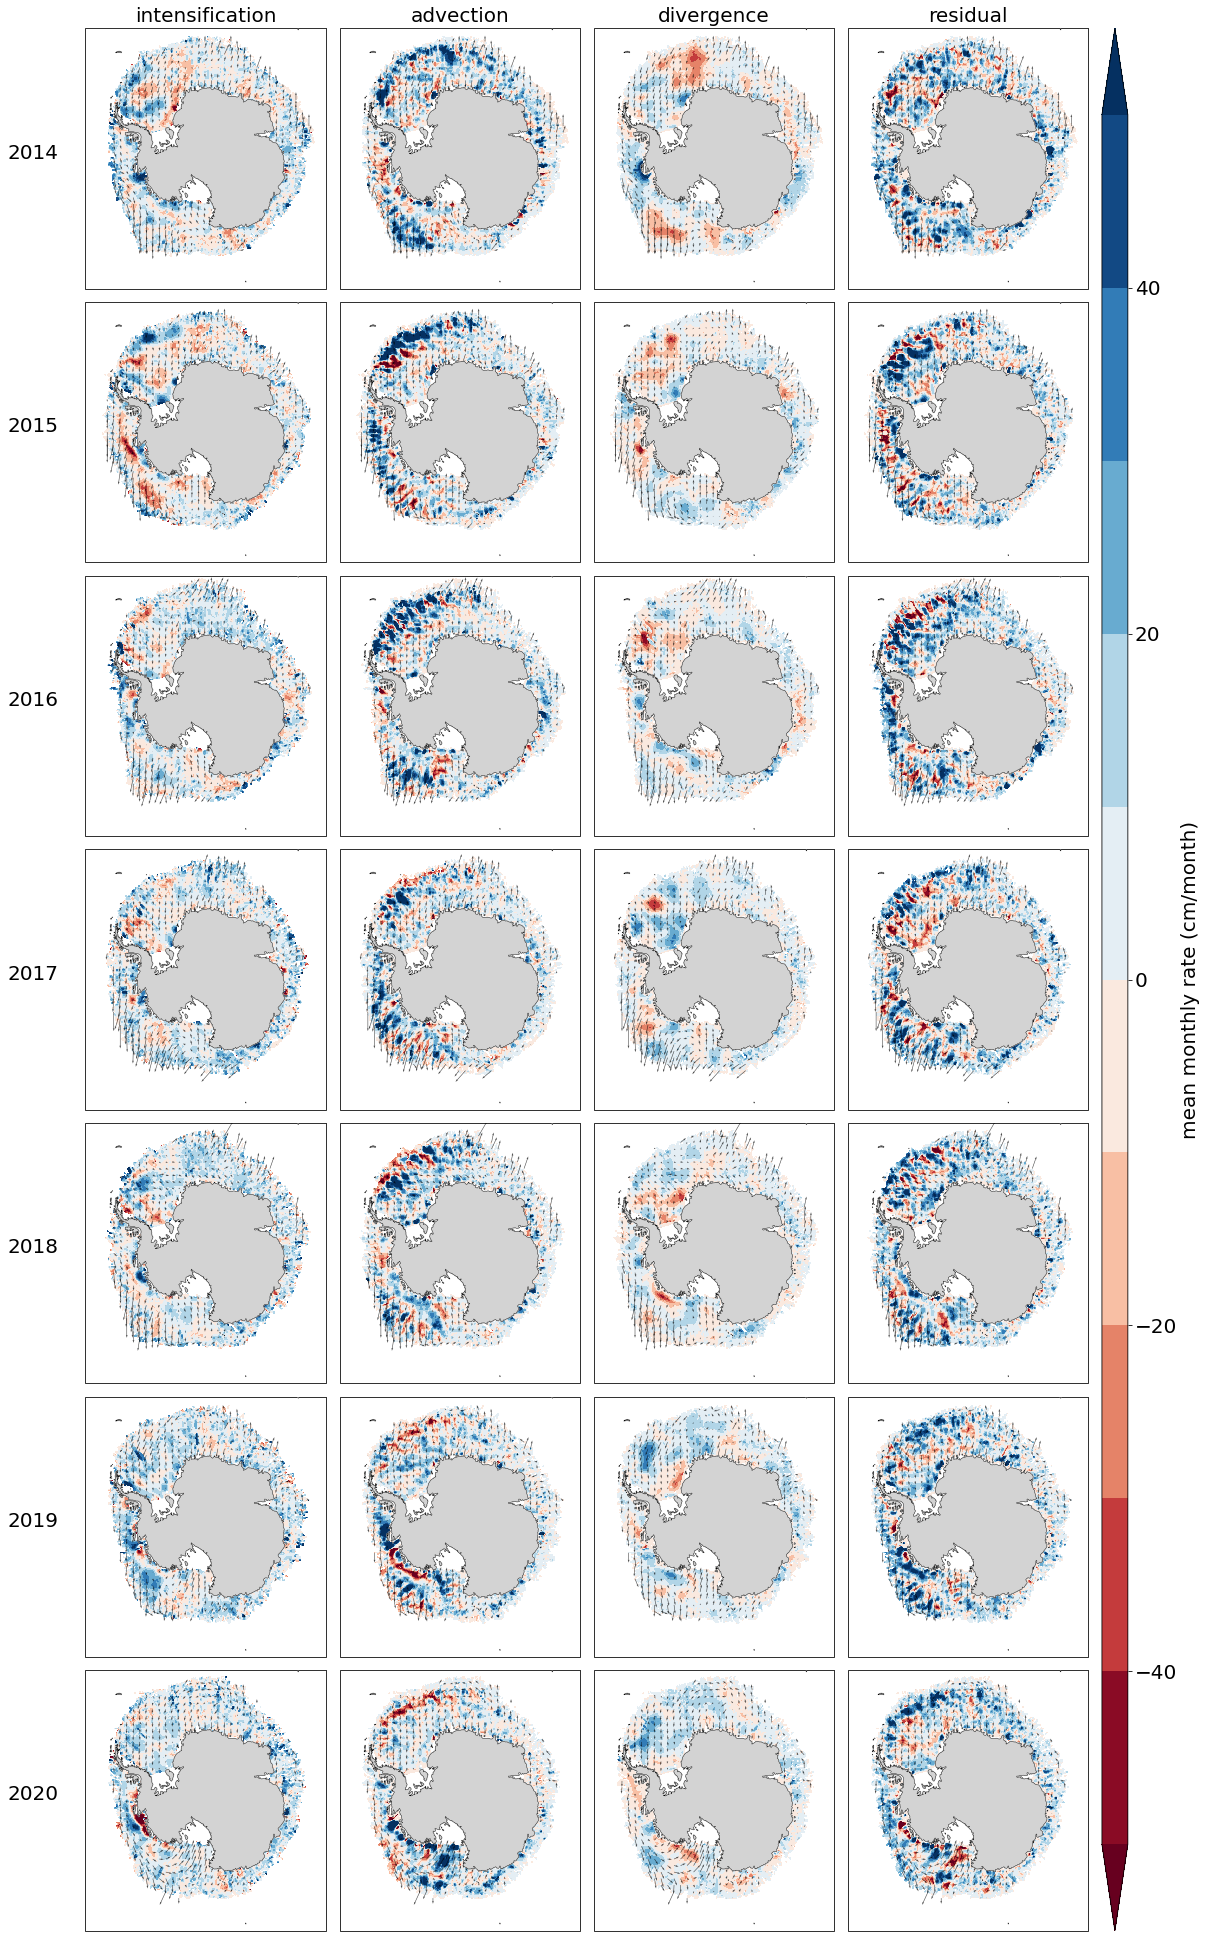

In [8]:
for season, months in zip(seasons,season_months):
    all_budgets = [] 

    for file in files:
        start_date_str = file.split('/')[9].split('_')[1].split('--')[0]
        start_date = datetime.datetime.strptime(start_date_str,"%Y%m%d").date()

        if start_date.month in months:
            data = Dataset(file)

            intensification = np.array(data['intensification']) * 86400
            advection = np.array(data['advection']) * 86400
            divergence = np.array(data['divergence']) * 86400
            residual = np.array(data['residual']) * 86400
            ice_drift_x = np.array(data['ice_drift_x']) 
            ice_drift_y = np.array(data['ice_drift_y']) 

            b = {'year':start_date.year,'month':start_date.month,'intensification':intensification,'advection':advection,
                'divergence':divergence,'residual':residual,'ice_drift_x':ice_drift_x,'ice_drift_y':ice_drift_y}

            all_budgets.append(b)

    ### create dataframe of all budgets
    all_budgets = pd.DataFrame(all_budgets).sort_values(['month','year'])
    
    climatologies = {}

    for term in budget_terms:
        climatologies[term] = np.nanmean(np.array([data for data in all_budgets[term]]),axis=0)
    
    fig = plt.figure(figsize=(18,35))
    spec = gridspec.GridSpec(ncols=4, nrows=7, wspace=0.05,hspace=0.05)

    count = 0
    for count_y,year in enumerate(sorted(set(all_budgets['year']))):
        year_data = all_budgets[all_budgets['year']==year]
        drift_mean_x = np.nanmean(np.array([data for data in year_data['ice_drift_x']]),axis=0)
        x_anom = drift_mean_x - climatologies['ice_drift_x']
        drift_mean_y = np.nanmean(np.array([data for data in year_data['ice_drift_y']]),axis=0)
        y_anom = drift_mean_x - climatologies['ice_drift_y']

        for count_b,term in enumerate(budget_terms[:4]):
            mean = np.nanmean(np.array([data for data in year_data[term]]),axis=0)
            diff = mean - climatologies[term]
            ax = fig.add_subplot(spec[count],projection=ccrs.SouthPolarStereo())
            ax.set_extent([-60, 180, -90, -55], ccrs.PlateCarree())
            ax.add_feature(cfeature.COASTLINE, zorder=100,linewidth=0.4)
            ax.add_feature(cfeature.LAND, zorder=99, color='lightgray', edgecolor='black')
            cmap = ax.contourf(grid_x,grid_y,diff*100,cmap='RdBu',levels=np.arange(-50,55,10),extend='both')
            ax.quiver(grid_x[::8, ::8], grid_y[::8, ::8], x_anom[::8, ::8],y_anom[::8, ::8], scale=2.7, 
                      color='black', alpha=0.7)
            
            if count_y == 0:
                ax.set_title(term,fontsize=20)

            if count == 7: 
                cbar_ax = fig.add_axes([0.91, 0.125, 0.02, 0.755]) # x, y, width, height
                a = fig.colorbar(cmap, cax=cbar_ax,extend='both',) 
                a.set_label('mean monthly rate (cm/month)',size=20)
                a.ax.tick_params(labelsize=20)
            count += 1 
        ax.text(-3.5,0.5,year,transform=ax.transAxes,fontsize=20)

    plt.savefig(f'{figpath}budgets_anoms_{season}.jpg',bbox_inches = "tight", dpi = 800)
    plt.show()